<h1>Анализ гипотез для увеличения выручки интернет магазина</h1>

 <h2>Краткое описание проекта</h2>

Совместно с отделом маркетинга интернет магазина подготовлен список гипотез для увеличения выручки

<h2>Цель проекта</h2>

Понять приведут ли изменения, указанные в гипотезах, к лучшему результату

<h2>План работы</h2>

* приоритизация гипотез;
* запуск A/B-тестов;
* анализ результатов.

<h3> Приоритизация гипотез </h3>

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

Откроем датафрейм с перечислением гипотез

In [2]:
hypothesis = pd.read_csv('hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Приведём название столбцов к нижнему регистру

In [3]:
hypothesis.columns = hypothesis.columns.str.lower()

Применим фреймворк ICE для приоритизации гипотез. Затем отсортируем их по убыванию приоритета.

In [4]:
hypothesis['ice'] = round((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'], 2)
hypothesis.sort_values('ice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00


Применим фреймворк RICE для приоритизации гипотез. Затем отсортируем их по убыванию приоритета.

In [5]:
hypothesis['rice'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis.sort_values('rice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00,3.0


На основании применения двух фреймворков мы получили разные результаты. Это объясняется тем, что в отличие от ICE RICE учитывает оценку количества пользователей, которых затронут изменения и чем их больше, тем приоритет гипотезы выше. 

Тем не менее можем отметить что гипотезы под номерами 7,0 и 6 имеют высокий приоритет по результатам применения обоих фрейворков.

<h3>Анализ A/B-теста</h3>

Откроем датафреймы с заказами и с пользователями

In [6]:
orders = pd.read_csv('orders.csv')
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [7]:
visitors = pd.read_csv('visitors.csv')
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


В обоих датафреймах приведём данные в столбцах с датой к типу datetime 

In [8]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Также оба датафрейма проверим на наличие дубликатов и пропусков

In [9]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [10]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [11]:
orders.duplicated().sum()

0

In [12]:
visitors.duplicated().sum()

0

Приведём название столбцов к змеиному регистру

In [13]:
def snake_register(s):
    return ''.join(['_'+c.lower() if c.isupper() else c for c in s]).lstrip('_')

In [14]:
for df in [orders, visitors]:
    df.columns = df.columns.map(lambda x: snake_register(x))

Данные для анализа оптимизированы. Тип данных в столбцах с датами изменён на корректный. Дубликатов и пропусков не обнаружено.

<h3>Анализ A/B-теста</h3>

Проверим корректность разделения пользователей по группам.

In [15]:
group_a=orders.query('group == "A"') 
group_b=orders.query('group == "B"') 

Получим id пользователей, попавших в обе группы

In [16]:
group_intersections=list(np.intersect1d(group_a['visitor_id'], group_b['visitor_id']))
len(group_intersections)

58

Мы видим что 58 пользователей попали в обе группы. Данный факт может исказить выводы дальнейшего исследования. Нам придётся удалить записи о покупках этих пользователей.

In [17]:
orders = orders.query('visitor_id not in @group_intersections')

In [18]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date', 'group']].drop_duplicates().reset_index(drop=True)

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = (datesGroups
                    .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],
                                                           orders['group'] == x['group'])]
                           .agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique',
                                 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1)
                    .sort_values(by=['date','group'])
                    .reset_index(drop=True))

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = (datesGroups
                      .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],
                                                               visitors['group'] == x['group'])]
                             .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
                      .sort_values(by=['date','group'])
                      .reset_index(drop=True))

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData
cumulativeData['aov'] = cumulativeData["revenue"] / cumulativeData["orders"]
cumulativeData['conversion'] = cumulativeData["orders"] / cumulativeData["visitors"]

<h4>Построим график кумулятивной выручки по группам</h4>

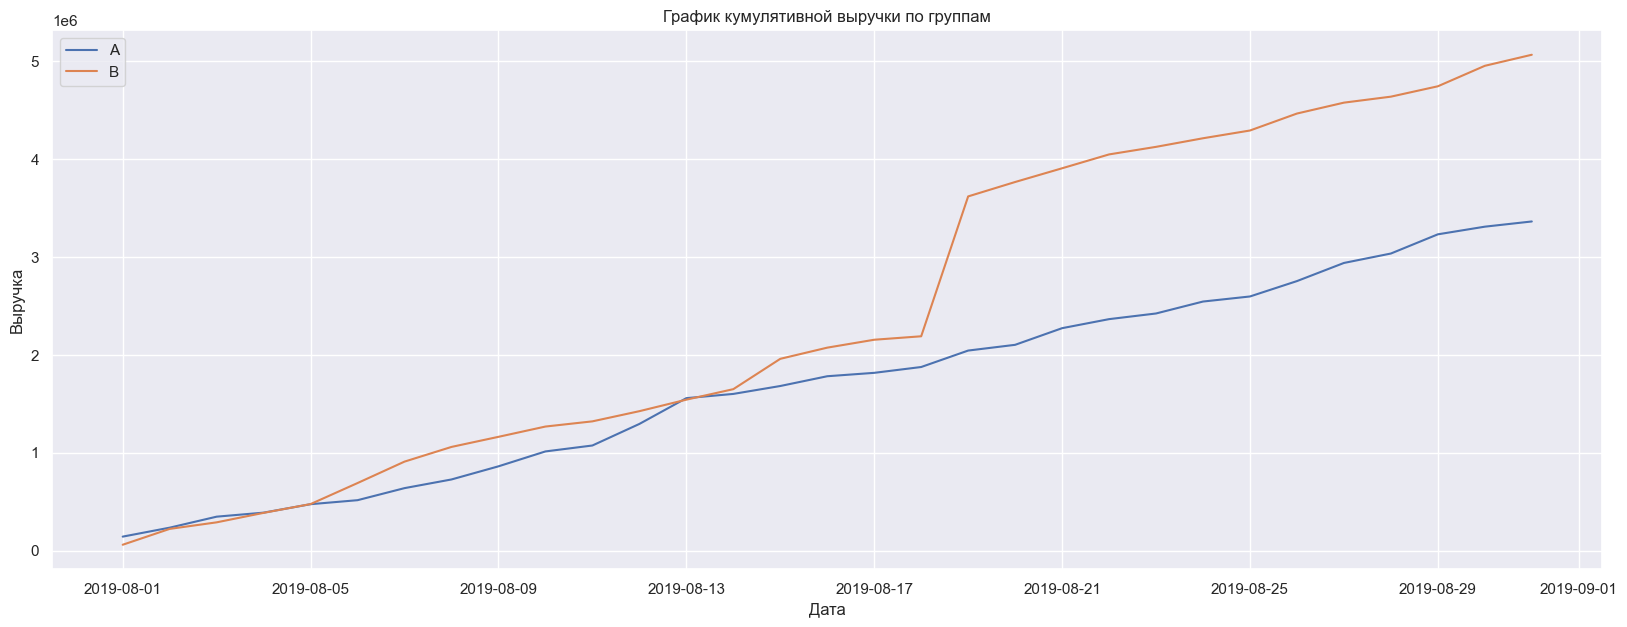

In [19]:
sns.set(font_scale=1, rc={'figure.figsize':(20,7)})
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend();

Можно сделать следующие выводы:
* наблюдается стабильно растущая выручка на протяжении всего теста в обоих группах;
* в начале теста метрика показывает близкие значения в обоих группах;
* у группы B наблюдается резкий всплеск после 17.08, который может быть связан с резким увеличением заказов в этот день, либо с появлением очень дорогих заказов в выборке;
* после выброса в группе B выручки в обоих группах стабилизируются и растут практически одинаково.

<h4>Построим график кумулятивного среднего чека по группам</h4>

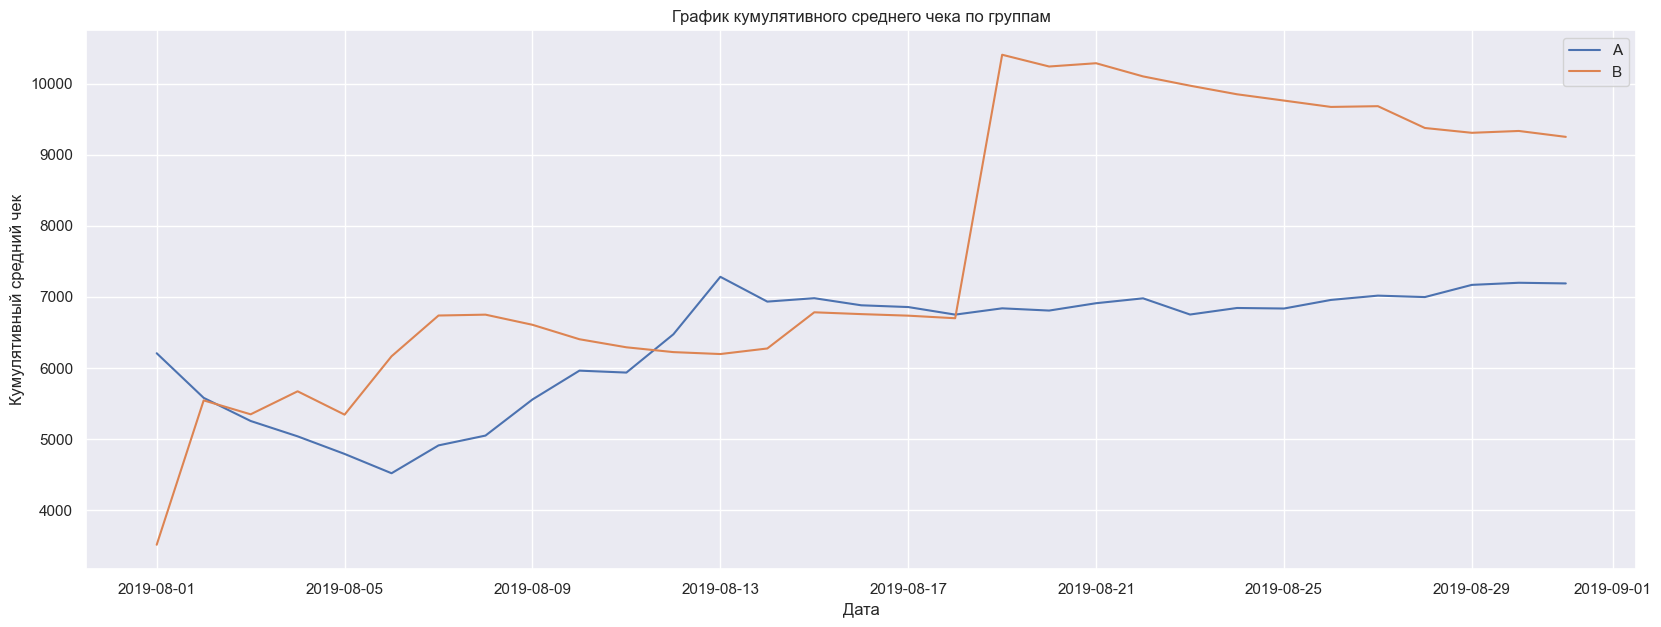

In [20]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный cредний чек')
plt.legend();

Можно сделать следующие выводы:
* в первой половине теста графики ведут себя не стабильно. Замечены как сильные возрастания, так и падения;
* на графике среднего чека анамальное значения для группе B в период с 08.17 по 08.21 уже более явное;
* к коцу периода коммулятивный средний чек группы B, выше, чем у А, но стоит учесть, что были анамальные значения;
* к концу периода у группы А есть тенденция к росту, а у B к снижению.

<h4>Построим график относительного изменения кумулятивного среднего чека группы B к группе A</h4>

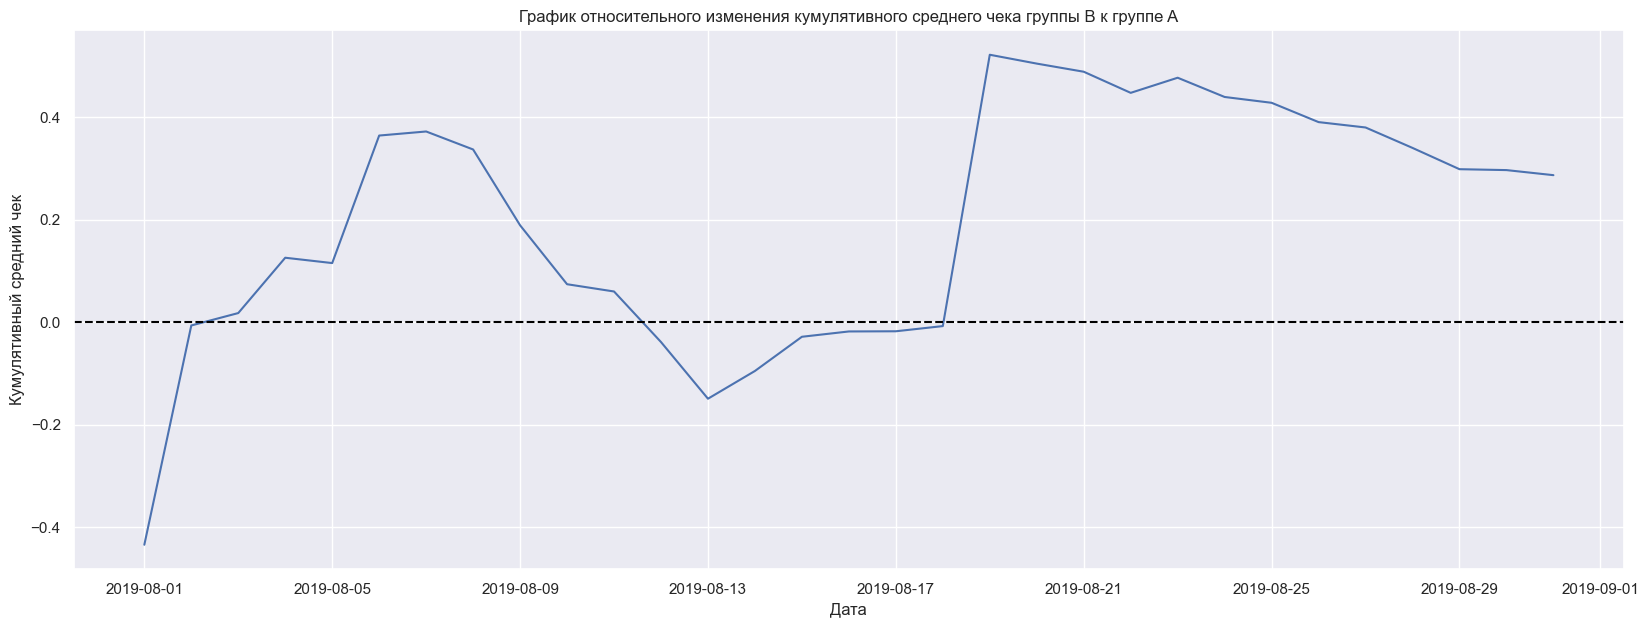

In [21]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный cредний чек');

Можно сделать следующие выводы:
* в начале теста лучше себя чувствовали показатели группы B, но затем они стали ухудшаться относительно А;
* ближе к середине теста 13.08 А достигает своих лучших показателей, поэтому график опускается в худшую за время теста для B точку;
* важно отметить, что на графике присутствуют резкие скачки в некоторых днях, например 05.08 или 08.08, но особенно выделяется, конечно скачок 18.08. Можно сделать вывод о наличии выбросов;
* после выброса метрика снижается и стремится к стабилизации.

<h4>Построим график кумулятивного среднего количества заказов на посетителя по группам</h4>

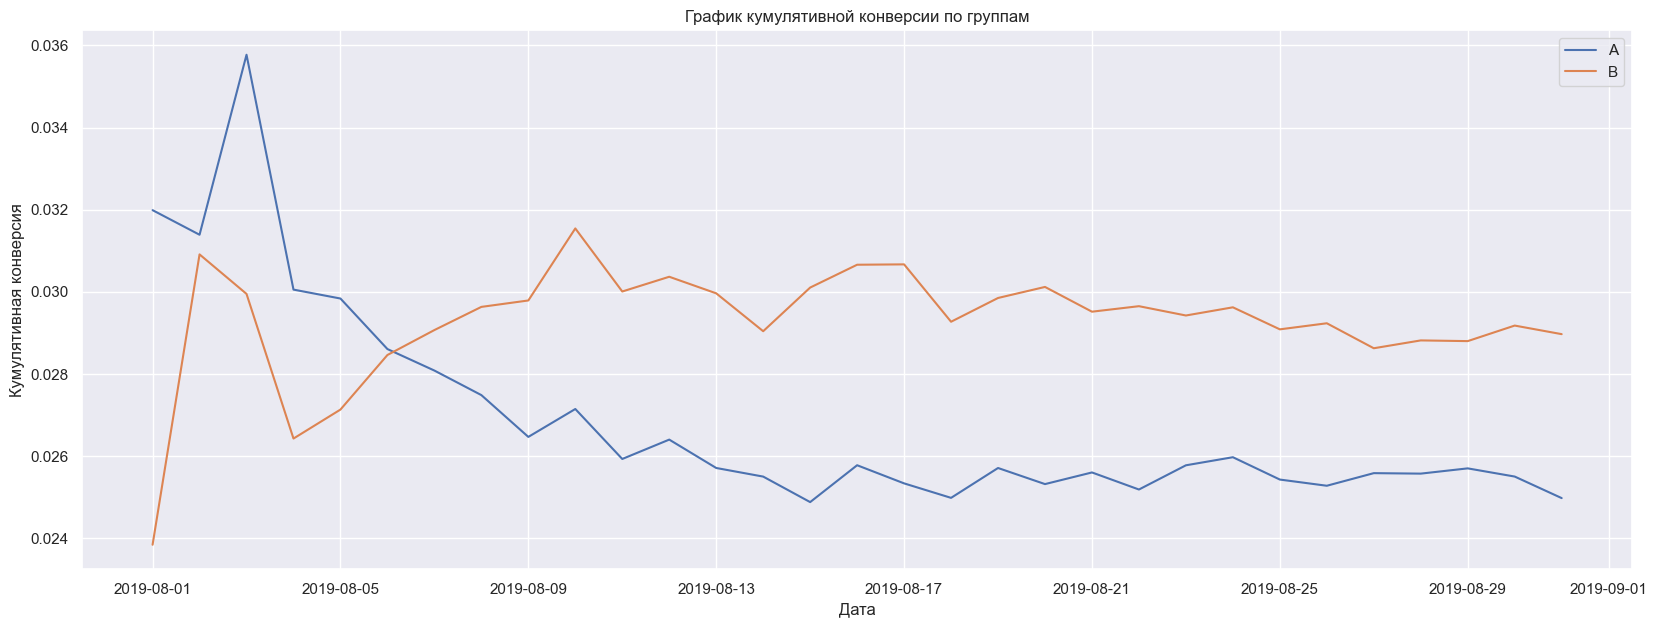

In [22]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('График кумулятивной конверсии по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная конверсия');

Можно сделать следующие выводы:
* наблюдаются заметные колебания в начале теста. Конверсия у группы А была больше группы B, но уже к концу первой недели тестирования конверсия группы В выросла, а группы А снизилась, после чего графики начали стремиться к стабилизации;
* к 11-12 августа различие в конверсиях у обоих групп становится очевидным;
* можно сделать вывод что конверсия у группы В стабильно лучше по накопленным показателям чем у группы A.

<h4>Построим график  относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A</h4>

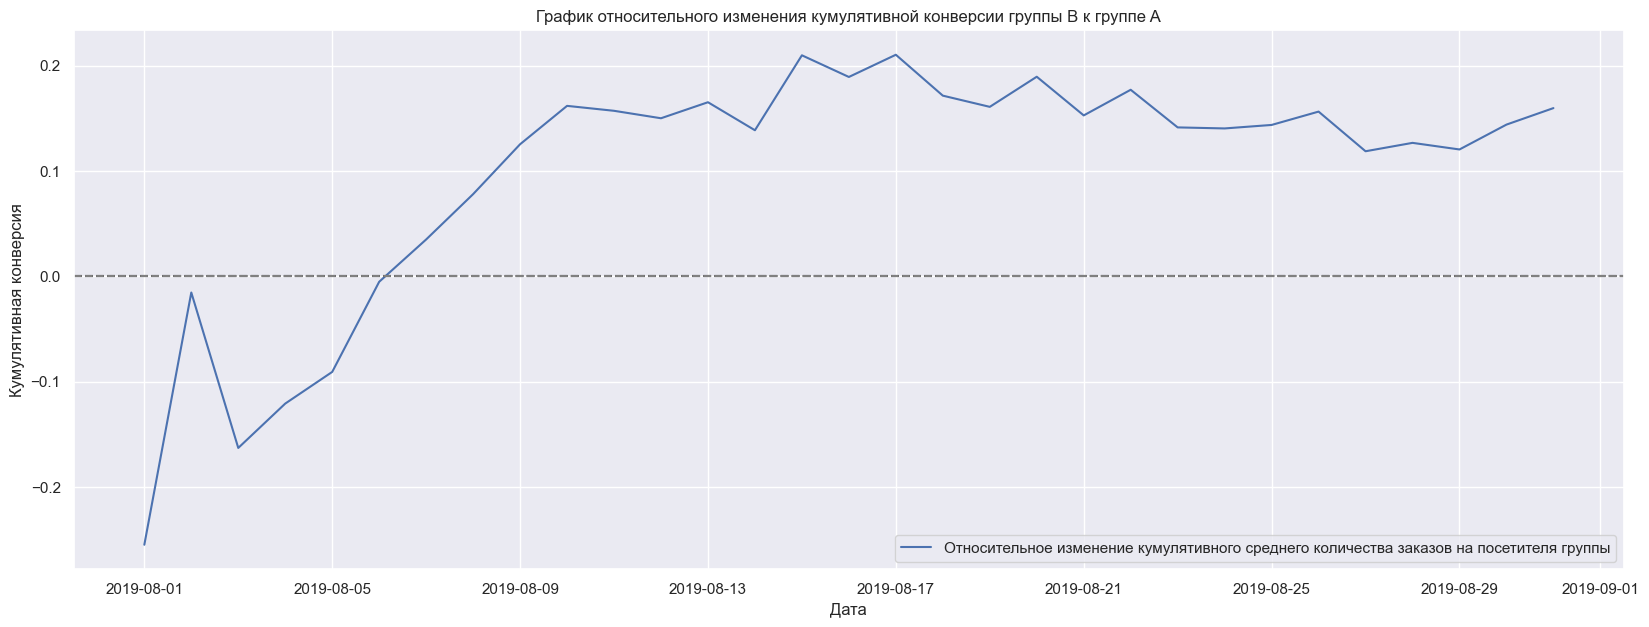

In [23]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительное изменение кумулятивного среднего количества заказов на посетителя группы")
plt.legend()
plt.axhline(color='black', linestyle='--')
plt.axhline(color='grey', linestyle='--')
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная конверсия');

Можно сделать следующие выводы:
* на графике видим, что в начале теста, конверсия показывала не стабильные результаты, сначала резко поднимаясь, а потом опускалась;
* на 6й день теста, получили стабильный прирост, который привысил 20% и установился в пределах от 10 до 15 % к концу периода.

<h4>Построим точечный график количества заказов по пользователям.</h4>

Cоздадим сводную таблицу с колличеством заказов по каждому пользователю

In [24]:
orders_count = (orders.groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'}))
orders_count.columns = ['user_id', 'orders']
orders_count.sort_values(by='orders', ascending=False).head(10) 

,user_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


На основе полученной таблицы построим точечную диаграмму:

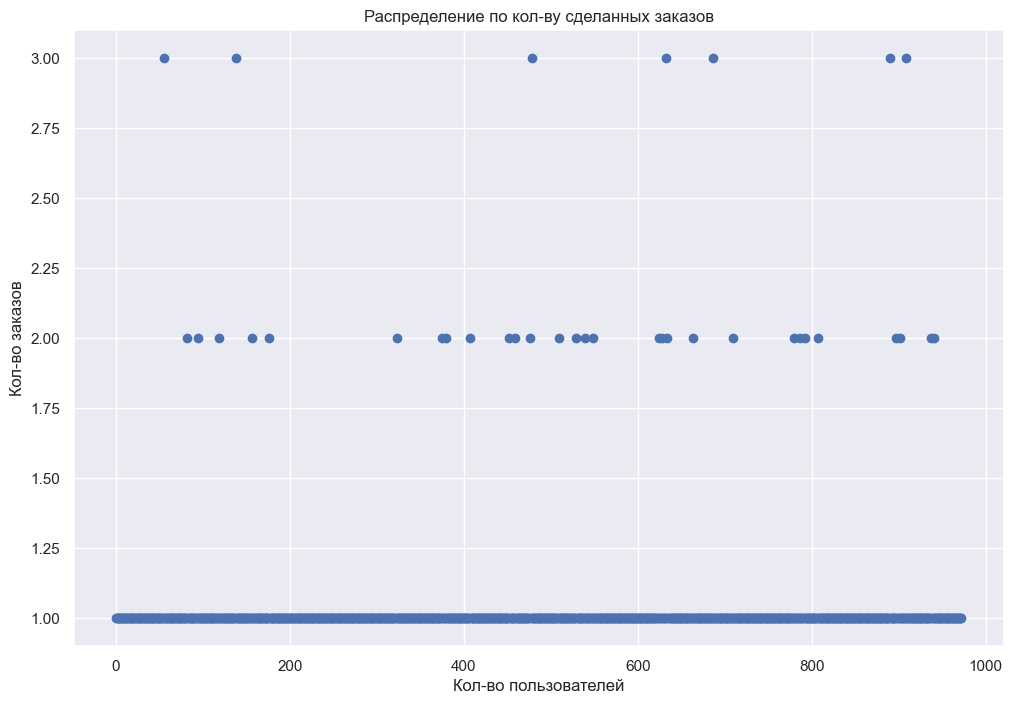

In [25]:
x_values = pd.Series(range(0, len(orders_count)))
plt.figure(figsize=(12,8)) 
plt.scatter(x_values, orders_count['orders'])  
plt.ylabel('Кол-во заказов') 
plt.xlabel('Кол-во пользователей') 
plt.title('Распределение по кол-ву сделанных заказов') 
plt.show()

Присутствуют пользователи, которые совершали по 1, 2, 3 заказов. Наиболее часто встречается 1 заказ, не редки случаи и 2-х заказов.

<h4>Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Затем выберем границу для определения аномальных пользователей.</h4>

In [26]:
percentiles = np.percentile(orders_count['orders'], [95, 99])
print('Перцентили:\n95: {}\n99: {}'.format(percentiles[0],percentiles[1]))

Перцентили:
95: 1.0
99: 2.0


Можно сделать следующие выводы: 
<br>не более 5% пользователей оформляли больше чем один и не более 1% пользователей - больше двух заказов.

<h4>Построим точечный график стоимостей заказов</h4>

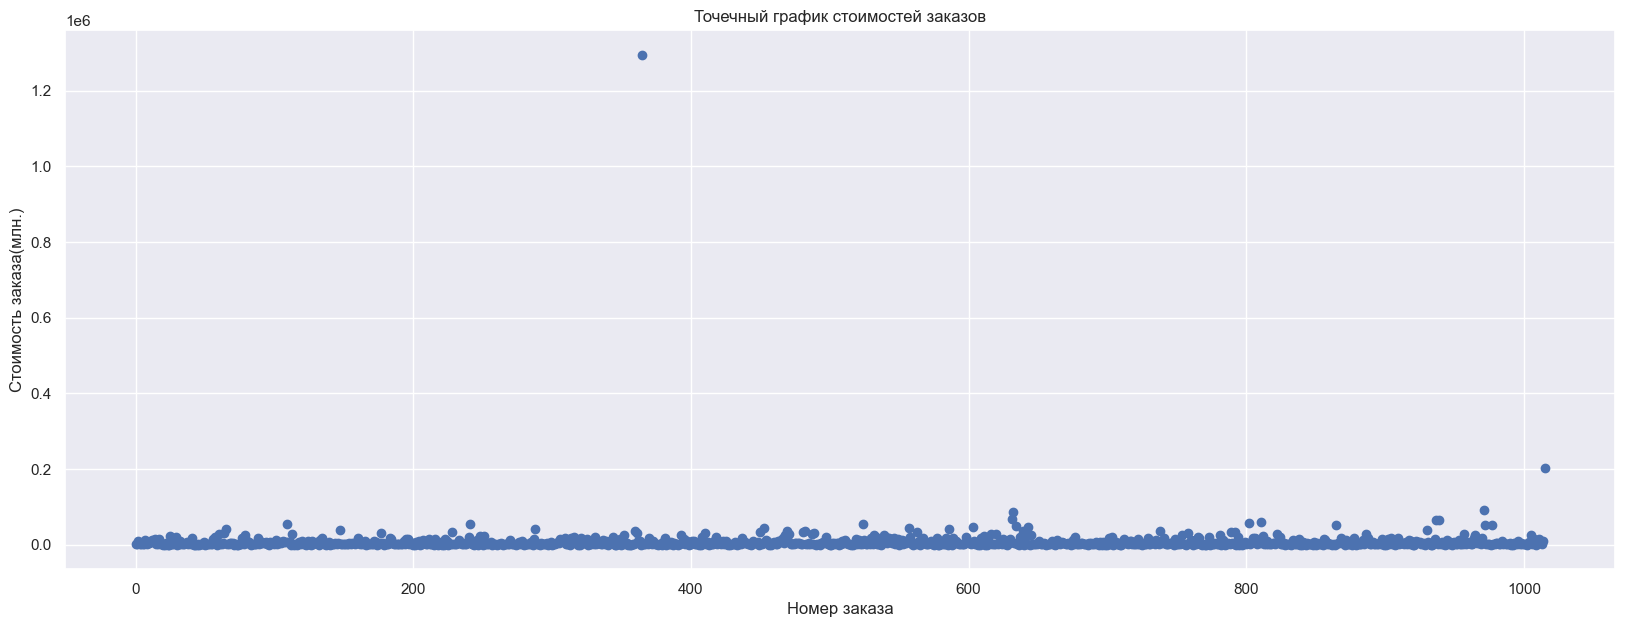

In [27]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']);
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость заказа(млн.)');
plt.xlabel('Номер заказа');

Большинство заказов не превышает 20000, но есть выбросы в 200000 и 1200000. Для того, чтобы точно определить стоимость заказа, которую следует считать аномальной посчитаем выборочные перцентели.

<h4>Посчитаем 95-й и 99-й перцентили стоимости заказов. Затем выберем границу для определения аномальных заказов.</h4>

In [28]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


Делаем вывод что не более чем у 5% пользователей чек дороже 26785, и только не более чем у 1% пользователей чек дороже 53904. Границей для определения аномальных заказов следует обозначить до 26785.

<h4>Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Затем сделаем выводы и предположения.</h4>

In [29]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id':'nunique'})
ordersByUsersA.columns = ['visitor_id', 'orders']
ordersByUsersB = orders[orders['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id':'nunique'})
ordersByUsersB.columns = ['visitor_id', 'orders']
print('Кол-во покупателей в группе A: {}'.format(len(ordersByUsersA)))
print('Кол-во покупок в группе А: {}'.format(ordersByUsersA['orders'].sum()))
print('Кол-во посетителей в группе A: {}\n'.format(visitors[visitors['group']=='A']['visitors'].sum()))
print('Кол-во покупателей в группе B: {}'.format(len(ordersByUsersB)))
print('Кол-во покупок в группе B: {}'.format(ordersByUsersB['orders'].sum()))
print('Кол-во посетителей в группе B: {}'.format(visitors[visitors['group']=='B']['visitors'].sum()))

Кол-во покупателей в группе A: 445
Кол-во покупок в группе А: 468
Кол-во посетителей в группе A: 18736

Кол-во покупателей в группе B: 528
Кол-во покупок в группе B: 548
Кол-во посетителей в группе B: 18916


Составим списки кол-ва заказов sampleA и sampleB со всеми пользователями (в том числе и не купившими) по группам 

In [30]:
list_orders_1 =[]
for i in range(0,(visitors[visitors['group']=='A']['visitors'].sum()-len(ordersByUsersA))):
    list_orders_1.append(0)
orders_by_non_purchased_users_A = pd.Series(data = list_orders_1, name = 'orders')

list_orders_2 =[]
for i in range(0,(visitors[visitors['group']=='B']['visitors'].sum()-len(ordersByUsersB))):
    list_orders_2.append(0)
orders_by_non_purchased_users_B = pd.Series(data = list_orders_2, name = 'orders')

sampleA = pd.concat([ordersByUsersA['orders'], orders_by_non_purchased_users_A], axis=0)
sampleB = pd.concat([ordersByUsersB['orders'], orders_by_non_purchased_users_B], axis=0)
print('\nОтносительный прирост конверсии группы B по отношению к группе A: {:.3f}'.format(sampleB.mean()/sampleA.mean()-1))


Относительный прирост конверсии группы B по отношению к группе A: 0.160


Данные для проведения теста Манна-Уитни готовы. Сформируем нулевую и альетрнативную гипотезы:
<br><b>Нулевая гипотеза: Различий в конверсии между группами нет</b></br>
<br><b>Альтернативная гипотеза: Различия в конверсиях между группами есть</b></br>
<br>Коэффициент альфа: 0.05

In [31]:
alpha = 0.05
results = stats.mannwhitneyu(sampleA, sampleB)
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

P-value: 0.011018084110014696
Отвергаем нулевую гипотезу


Поскольку нулевая гипотеза отвергнута делаем вывод что конверсии у групп существенно различаются. Посчитаем относительный прирост конверсии группы В к группе А в процентах.

In [32]:
print("{0:.2f}".format(sampleB.mean() / sampleA.mean() - 1))

0.16


Делаем вывод что относительный проигрыш группы A составляет 16%

<h4>Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Затем сделаем выводы и предположения.</h4>

Сформулируем гипотезы:
<br><b>Нулевая гипотеза: Различий в средних чеках между группами нет</b></br>
<br><b>Альтернативная гипотеза: Различия в средних чеках между группами есть</b></br>
<br>Коэффициент альфа: 0.05

In [33]:
result_2 = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]  
print(f'Значение p-value : {result_2}')
if result_2 < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Значение p-value : 0.8294908998149533
Не получилось отвергнуть нулевую гипотезу


Поскольку нулевая гипотеза не отвергнута делаем вывод что существенных различий в средних чеках между группами нет. Посчитаем относительный прирост среднего чека В к группе А в процентах.

In [34]:
print('{0:.2f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.29


Средний чек группы B выше чем у А на 29%. Данный прирост вызван присутствием выбросов в стоимостях заказов.

<h4>Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.</h4>

Ранее мы изучили распредление заказов по количеству для пользователя и сумме, границы были опредлены следующие:

кол-во > 1
<br>сумма > 26785

Объединим аномальных пользователей в одной таблице:

In [35]:
many_orders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 1]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 1]['visitor_id'],
    ],
    axis=0,
)

Собираем пользователей со слишком дорогими заказами

In [36]:
expensive_orders = orders[orders['revenue'] > 26785]['visitor_id']

Полученные датафреймы объединяем в один датафрейм

In [37]:
abnormal_users = (
    pd.concat([many_orders, expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormal_users.head(5))
print(' ')
print('Количество анамальных пользователей: ', abnormal_users.shape[0])

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
Name: visitor_id, dtype: int64
 
Количество анамальных пользователей:  86


Такое количество может повлиять на итоговые выводы, используем полученные данные для того, чтобы убрать аномалии:

In [38]:
sample_a_filtered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

#отфильтруем данные в группе В
sample_b_filtered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)  

Анамалии удалены.
Сформулируем гипотезы:
<br><b>Нулевая гипотеза: Различий в среднем количестве заказов на посетителя между группами нет</b></br>
<br><b>Альтернативная гипотеза: Различия в среднем количестве заказов на посетителя между группами есть</b></br>
<br>Коэффициент альфа: 0.05

In [39]:
result_3 = stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1] 
print(f'Значение p-value : {result_3}') 
if result_3 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Значение p-value : 0.01593020716573973
Отвергаем нулевую гипотезу


Поскольку нулевая гипотеза отвергнута делаем вывод что присутствуют различия в среднем количестве заказов на посетителя между группами. Посчитаем относительный прирост конверсии группы В к группе А в процентах.

In [40]:
print("{0:.2f}".format(sample_b_filtered.mean() / sample_a_filtered.mean() - 1))

0.17


Результаты после фильтрации по конверсии значимо не изменились. Проигрыш группы A немного увеличился: до 17% на очищенных данных против 16% на сырых данных.

<h4>Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.</h4>

Сформируем нулевую и альтернативную гипотезы:
<br><b>Нулевая гипотеза: Различий в средних чеках между группами нет</b></br>
<br><b>Альтернативная гипотеза: Различия в средних чеках между группами есть</b></br>
<br>Коэффициент альфа: 0.05

In [41]:
result4 = stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'])[1] 

Посчитаем средние значения:

In [42]:
mean_revenue_b = orders[np.logical_and(orders['group']=='B',
                                       np.logical_not(orders['visitor_id'].
                                                      isin(abnormal_users)))]['revenue'].mean()
mean_revenue_a = orders[np.logical_and(orders['group']=='A',
                                       np.logical_not(orders['visitor_id'].
                                                      isin(abnormal_users)))]['revenue'].mean() 

In [43]:
print(f'Значение p-value : {result4}')  
if result4 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Значение p-value : 0.7271286894009963
Не получилось отвергнуть нулевую гипотезу


Поскольку нулевая гипотеза не отвергнута делаем вывод что существенных различий в средних чеках между группами на основании очищенных данных нет. Посчитаем относительный прирост среднего чека В к группе А в процентах.

In [44]:
print('{0:.2f}'.format(orders[np.logical_and(orders['group']=='B',
                                       np.logical_not(orders['visitor_id'].
                                                      isin(abnormal_users)))]['revenue'].mean()
                      / orders[np.logical_and(orders['group']=='A',
                                       np.logical_not(orders['visitor_id'].
                                                      isin(abnormal_users)))]['revenue'].mean() 
                      -1
                      )
     )

-0.03


Средний чек заказа между группами по очищенных данным на основании анализа очищенных данных стал больше у группы А чем у группы В. Разница составляет 3%. Это еще раз подтвердает то что полученная разница на сырых данных в пользу группы В говорит о наличии выбросов.

<h3> Вывод</h3>

В результате анализа результатов A/B-тестирования можно сделать следующие выводы:

* наблюдается статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий;
* не выявлено статистически значимого различия по среднему чеку между группами по сырым данным, а также по очищенным данным;
* график различия конверсии между группами сообщает, что результаты группы B лучше группы A, а именно у группы В наблюдается тенденция к росту;
* график различия среднего чека колеблется, хотя к концу периода наблюдения тоже показывает, что результаты группы B становятся лучше группы A;
* глядя на данные очищенные от аномальных пользователей мы видим, что средний чек практически не изменился и даже стал немного меньше по отношению к группе A;
* по фреймворку ICE наиболее приоритетными были гипотезы: запустить акцию, дающую скидку на товар в день рождения, добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей, добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
* по фреймворку RICE наиболее приоритетные гипотезы расположились следующим образом: добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок, добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа, добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
* различие в приотизации гипотез объясняется тем что фреймворк RICE учитывает параметр Reach (скольких пользователей затронет изменение, которое планируется внести), поэтому в лидеры вышли гипотезы с наибольшим охватом пользователей.

По результатам A/B теста принимаем решение остановить тест т. к. и до и после очистки данных, показатель конверсии в группе B больше показателя в группе A. До очистки прирост составлял 16%, а после очистки данных прирост уже 17%. Данная разница показателей конверсии между группами до и после очистки данных является статистически значимой, что позволяет сделать вывод о том, что A/B тест можно остановить и зафиксировать победу группы B в части улучшения конверсии в целевой группе B.
<br>В части среднего чека нельзя утверждать, что какая-либо из групп имеет преимущество над другой. Оснований полагать, что при продолжении теста разница между группами в конверсиях либо среднем чеке значимо изменятся нет, т. к. если обратить внимание на графики, то колебания в них имеют затухающий характер.